# Lab 09 - Radiation Shielding (Part 1)

Edit this cell and provide the information requested:

- Your name: Marie Curie
- Your student number: 12345678
- Partner's name: Ray Gamma

In [1]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Familiarize

### Experimental Goal

Find the radiation attenuation coefficient, $μ$, for low-energy gamma rays attenuated by shielding.

### Equipment familiarization

We signed out source 1. The source is Fe-55 which emits gamma rays. These photons are detected by a Geiger counter. We placed the source in the holder beneath the Geiger tube and ensured the tube placement was '1' on the ruler. We know that if this is moved then the inverse square law tells us less counts will be detected.

We also have a set of paper sheets (stapled in groups of five sheets as well as single sheets) to attenuate the radiation before it is detected. Without any paper on top of the source, we notice that the counts increase very rapidly. If we only add one or two sheets, the counts still increase fairly quickly, but when we add ten or more sheets the count rate is increasing very slowly. 

These observations tell us that we will need to do longer measurements for more sheets of paper if we want to have a similar number of counts, $N$, for each measurement. This would be a good goal to aim for since the relative uncertainty in the number of counts is $1/\sqrt{N}$, so if we measured for a similar length of time for each measurement then the measurements with more sheets would systematically have less counts and thus higher relative uncertainty.

Also from the $1/\sqrt{N}$ relative uncertainty, we can see that even if we collect 100 counts we will still have a 10\% relative uncertainty! Therefore, we will ensure that we collect at least 100 counts for each measurement.

### Model familiarization

The model provided tells us that theoretically we would expect the detected count rate ($R$, counts per second) as a function of shielding thickness $x$ to be:

$$ R(x) = R_0 e^{-\mu x} $$

where $R_0$ is the unattenuated count rate (i.e., if $x=0 \implies e^{-\mu x} = 1$) and $\mu$ is the attenuation coefficient. 

Since the choice of units for $x$ is arbitrary and only affects the units of the resulting $\mu$, we decide to measure $x$ in units of "number of sheets". This also mitigates any systematic error if we were to measure the thickness of the sheets directly, such as squishing the paper during measurement because it is quite soft.

In our experiment we will choose a number of sheets, $x$, and then measure $R$ by collecting $N$ counts and dividing by the measured time $t$, i.e. $R = N/t$. This leaves $R_0$ and $\mu$ as our unknowns. By performing various measurements at different $x$, when we plot our data the theory tells us that we would expect exponentially decaying data. Therefore, we can linearize our data by plotting $\log R$ versus $x$:

$$ \log R = \log R_0 - \mu x .$$

From the above equation, we can see that the slope of the linearized model is $m = -\mu$ and the intercept is $b = \log R_0$. Therefore, we can obtain estimates of $\mu$ and $R_0$ (to address the experimental goal) by calculating $\mu = -m$ and $R_0 = e^b$. However, since $R_0$ is modeling the unattenuated count rate, we can also directly estimate $R_0$ by measuring $R(x=0$), i.e. the count rate without any paper shielding.

### Uncertainty familiarization

We already discussed uncertainty in the number of counts in the Equipment Familiarization section. However, since count rate is counts divided by seconds, we also have to factor in time uncertainty to calculate $u[R]$:

$$ u[R] = R \sqrt{\frac{1}{N} + \left(\frac{u[t]}{t}\right)^2}.$$

We know that $u[t]$ comes from any imprecision in starting and stopping our timer when starting and stopping our measurement of $N$. To estimate this timing precision, we use the lap function of our timer and try to press 'lap' every second for twenty seconds. This gives us twenty data points for trying to "start/stop" the timer in one-second intervals. If we take the standard deviation of these twenty points, $\sigma(t)$, this would be an estimate for our start/stop uncertainty. Since we need to factor in both starting and stopping the timer, we can say that $u[t] = \sqrt{\sigma(t)^2 + \sigma(t)^2} = \sqrt{2} \sigma(t)$. Our calculation of $\sigma(t)$ is shown below.

In [2]:
timingData = np.array([0.94, 1.00, 0.93, 1.02, 1.16, 0.99, 0.93, 1.01, 1.03, 1.04, 1.01, 0.90, 1.02, 1.01, 1.08, 1.04, 0.90, 0.80, 1.19, 1.00])
ut = np.sqrt(2) * np.std(timingData, ddof=1)
print('u[t] = ', ut)

u[t] =  0.12430861425881701


Since $u[t]$ only depends on starting/stopping the timer and has no dependence on how long the timer is run in between, we can use this estimate of $u[t]$ for each measurement. 

We note that for a typical measurement over many seconds, say 100, and a number of counts on the order of 100, the uncertainty in counts term is much more dominant than the timing uncertainty term when calculating $u[R]$, since $1/N \approx 1/100 = 0.01$ whereas $(u[t]/t)^2 \approx (0.124/100)^2 = 0.00000154$. Therefore, $u[R]/R \approx u[N]/N$ and our earlier decision to ensure we have at least 100 counts for each measurement will also ensure we keep $u[R]/R$ reasonably low.

### Initial measurement plan

Based on the expected exponential decay of the counts with increasing thickness, the curve will be changing most rapidly at low thicknesses, so we will take more measurements in this range. Therefore, for our initial measurement plan we will take measurements with 0, 1, 2, 3, 4, 5, 7, 10, and 15 sheets. We will use the analytical two-parameter fit formula to determine our best estimate of $m$ and $b$ (with uncertainty) and then convert these to estimates of $\mu$ and $R_0$. We will also compare our model estimate of $R_0$ with the direct measurement of $R(x=0)$.

We will acquire approximately 100 counts for each measurement as a compromise between minimizing relative uncertainty and having enough measurements taken for a reliable fit.

## Measure and analyze

In [3]:
de = data_entry.sheet('lab09_data1')

Sheet name: lab09_data1.csv


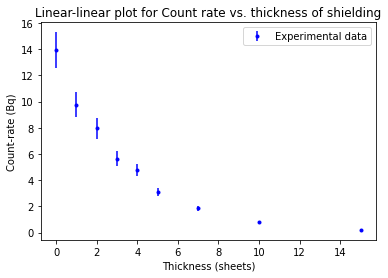

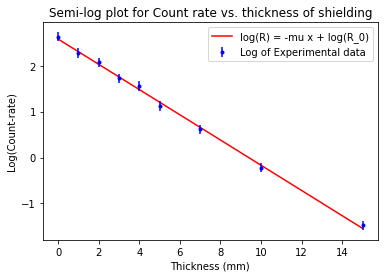

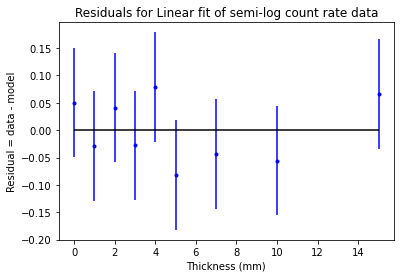

Chi-squared 0.40219615892456456
mu =  0.27510339334143585  +/-  0.007367672000997929
Rel uncertainty in mu =  0.026781465366564113
R0 =  13.222593385822627  +/-  0.6715394728161274
Rel uncertainty in R0 =  0.05078727396519336


In [4]:
RateVec = NVec / tVec # calculating count rate
uRateVec = RateVec * np.sqrt( 1/NVec + (ut/tVec)**2) # calculating uncertainty in count rate
logRateVec = np.log(RateVec) # taking log of count rate
ulogRateVec = uRateVec / RateVec # uncertainty of log(count rate), from the prelab

### LINEAR PLOT ###

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

plt.errorbar(xVec, RateVec, uRateVec, fmt="bo", markersize=3, label="Experimental data")
plt.title("Linear-linear plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (sheets)")
plt.ylabel("Count-rate (Bq)")
plt.legend()
plt.show()


### SEMILOG PLOT with model ###
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
A = np.sum(1/ulogRateVec**2)
B = np.sum(xVec*logRateVec/ulogRateVec**2)
C = np.sum(xVec/ulogRateVec**2)
D = np.sum(logRateVec/ulogRateVec**2)
E = np.sum(xVec**2/ulogRateVec**2)
Z = A * E - C**2

##### ANALYTIC BEST FIT PARAMETERS HERE #############################
slope = (A*B - C*D)/Z 
intercept = (D*E - B*C)/Z
#####################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()

# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)


# UNCERTAINTY IN BEST FIT PARAMETERS
uslope = np.sqrt(A/Z)
uintercept = np.sqrt(E/Z)

# CONVERTING TO R0 AND mu
R0 = np.exp(intercept)
uR0 = np.exp(intercept) * uintercept
mu = -slope
umu = uslope

print('mu = ', mu, ' +/- ', umu)
print('Rel uncertainty in mu = ', umu/mu)
print('R0 = ', R0, ' +/- ', uR0)
print('Rel uncertainty in R0 = ', uR0/R0)


The analytic best fit to our initial dataset gives us a chi-squared of 0.40, which tells us our model is likely a good fit to the data, but we may have overestimated our uncertainties. Since we are using a theoretical estimate for uncertainty, there is not much we can do to change our calculation of uncertainty, but we can improve our measurements by increasing the number of counts. (As we showed in familiarization, $u[R]/R \approx 1/\sqrt{N}$.) From the residuals plot, there seems to be a random scatter of residuals above and below the x-axis with no systematic trend, but all error bars cross the x-axis, which supports overestimating uncertainty.

From our model fit, we have estimates of $\mu=0.2751 \pm 0.0074$ (sheets)$^{-1}$ and $R_0 = 13.22 \pm 0.67$ Bq. The relative uncertainties in these parameters were 0.027 and 0.051, respectively, which are reasonable. 

Other groups found similar results: $\mu$ estiamtes ranged from 0.25 to 0.32 and $R_0$ ranged from 11.2 to 15.9. However, one group measured up to 20 sheets and found the measurements with a greater number of sheets did not agree with the model.

Since we did not go to this thickness, in the next round we will add new data points at 12, 17, and 20 sheets. We will also reduce the uncertainty of our existing data points by increasing to approximately 300 counts per measurement. We will compare our updated relative uncertainty in the fitting parameters to see if these improvements help increase the precision of our model.

## Improvement round

In [5]:
de2 = data_entry.sheet_copy('lab09_data1', 'lab09_data2')

Sheet name: lab09_data2.csv


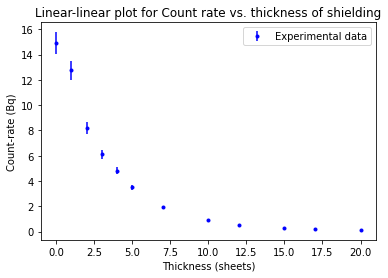

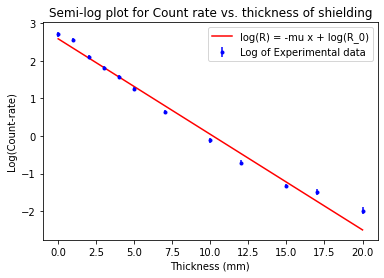

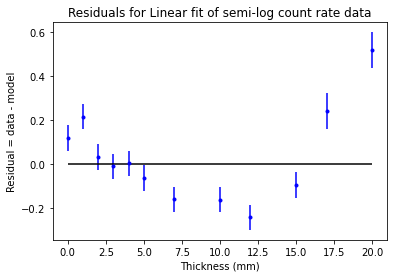

Chi-squared 10.411972852554495
mu =  0.2540381308636413  +/-  0.0029949922083424402
Rel uncertainty in mu =  0.01178953804360199
R0 =  13.261689235417737  +/-  0.36274193325081294
Rel uncertainty in R0 =  0.027352619022473025


In [6]:
RateVec = NVec / tVec # calculating count rate
uRateVec = RateVec * np.sqrt( 1/NVec + (ut/tVec)**2) # calculating uncertainty in count rate
logRateVec = np.log(RateVec) # taking log of count rate
ulogRateVec = uRateVec / RateVec # uncertainty of log(count rate), from the prelab

### LINEAR PLOT ###

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

plt.errorbar(xVec, RateVec, uRateVec, fmt="bo", markersize=3, label="Experimental data")
plt.title("Linear-linear plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (sheets)")
plt.ylabel("Count-rate (Bq)")
plt.legend()
plt.show()


### SEMILOG PLOT with model ###
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
A = np.sum(1/ulogRateVec**2)
B = np.sum(xVec*logRateVec/ulogRateVec**2)
C = np.sum(xVec/ulogRateVec**2)
D = np.sum(logRateVec/ulogRateVec**2)
E = np.sum(xVec**2/ulogRateVec**2)
Z = A * E - C**2

##### ANALYTIC BEST FIT PARAMETERS HERE #############################
slope = (A*B - C*D)/Z 
intercept = (D*E - B*C)/Z
#####################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()

# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)


# UNCERTAINTY IN BEST FIT PARAMETERS
uslope = np.sqrt(A/Z)
uintercept = np.sqrt(E/Z)

# CONVERTING TO R0 AND mu
R0 = np.exp(intercept)
uR0 = np.exp(intercept) * uintercept
mu = -slope
umu = uslope

print('mu = ', mu, ' +/- ', umu)
print('Rel uncertainty in mu = ', umu/mu)
print('R0 = ', R0, ' +/- ', uR0)
print('Rel uncertainty in R0 = ', uR0/R0)

We ended up not having enough time to get to 300 counts for the 17 and 20 sheet measurements, so we only got 150 counts. Nevertheless, with our improved dataset we now see a similar result to the other group who measured more data at great thicknesses: a poor fit to the data in this range. The chi-squared is now 10.41, which indicates a poor fit or underestimated uncertainties. However, the residuals plot have a significant V-shaped systematic trend, which supports a poor fit to the data.

Talking to the TAs and other groups, we realized that the model is underestimating the number of counts that we actually record, which tells us that there is radiation not coming from the source that is contributing to the total counts we measure. This is likely background radiation from space; we verified this by removing the source and running the counter, resulting in some counts being recorded. Since this only is apparent at greater thicknesses where the source radiation is more attenuated, this suggests this background count rate is constant and is only non-negligible at greater thicknesses. 

This means that our model should still provide a reasonable fit to the data in the lower thickness range. From looking at the residuals plot, it appears that all thickness up to 7 sheets of paper seem to have a negative linear trend in the residuals before leveling off and then increasing, so analyze this subset of the data below to determine our model fit parameters.

In [7]:
de3 = data_entry.sheet_copy('lab09_data2', 'lab09_data2_subset')

Sheet name: lab09_data2_subset.csv


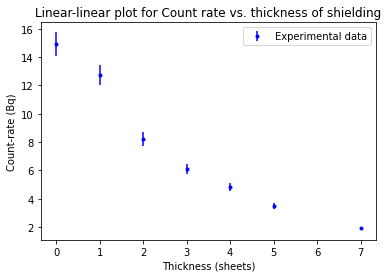

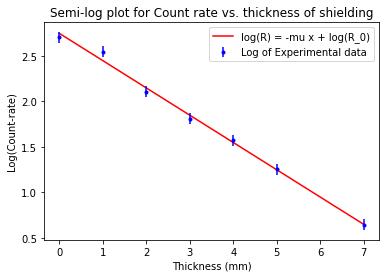

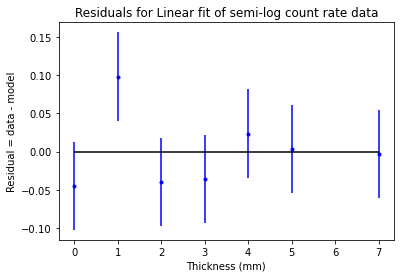

Chi-squared 0.9013890972231693
mu =  0.2998469713955955  +/-  0.009773131809999037
Rel uncertainty in mu =  0.032593731944369396
R0 =  15.588439799086393  +/-  0.5871254155913922
Rel uncertainty in R0 =  0.03766415517900659


In [8]:
RateVec = NVec / tVec # calculating count rate
uRateVec = RateVec * np.sqrt( 1/NVec + (ut/tVec)**2) # calculating uncertainty in count rate
logRateVec = np.log(RateVec) # taking log of count rate
ulogRateVec = uRateVec / RateVec # uncertainty of log(count rate), from the prelab

### LINEAR PLOT ###

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

plt.errorbar(xVec, RateVec, uRateVec, fmt="bo", markersize=3, label="Experimental data")
plt.title("Linear-linear plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (sheets)")
plt.ylabel("Count-rate (Bq)")
plt.legend()
plt.show()


### SEMILOG PLOT with model ###
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
A = np.sum(1/ulogRateVec**2)
B = np.sum(xVec*logRateVec/ulogRateVec**2)
C = np.sum(xVec/ulogRateVec**2)
D = np.sum(logRateVec/ulogRateVec**2)
E = np.sum(xVec**2/ulogRateVec**2)
Z = A * E - C**2

##### ANALYTIC BEST FIT PARAMETERS HERE #############################
slope = (A*B - C*D)/Z 
intercept = (D*E - B*C)/Z
#####################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()

# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)


# UNCERTAINTY IN BEST FIT PARAMETERS
uslope = np.sqrt(A/Z)
uintercept = np.sqrt(E/Z)

# CONVERTING TO R0 AND mu
R0 = np.exp(intercept)
uR0 = np.exp(intercept) * uintercept
mu = -slope
umu = uslope

print('mu = ', mu, ' +/- ', umu)
print('Rel uncertainty in mu = ', umu/mu)
print('R0 = ', R0, ' +/- ', uR0)
print('Rel uncertainty in R0 = ', uR0/R0)

The chi-squared of this fit over $x\in[0,7]$ sheets is 0.90, which suggests a good fit to the data. This is supported by the residuals: even scatter above and below the x-axis, the V-shaped trend is no longer present, and not all error bars are crossing the x-axis.

Our best fit parameters give $\mu = 0.2998 \pm 0.0098$ (sheets)$^{-1}$ and $R_0 = 15.58 \pm 0.59$ Bq, with relative uncertainties of 0.033 and 0.038, respectively. Compared to our initial round, the relative uncertainty in $\mu$ has gone up but gone down for $R_0$. This is likely because $R_0$ is more constrained in the fit by the low thickness measurements which are of higher quality compared to the initial round (more counts and hence lower relative uncertainty), whereas the estimate of $\mu$ is determined across the entire dataset and we now have fewer data points in this subset of the improved dataset than the entire initial dataset. Therefore, to improve next week we could measure more data points where the model appears to work.

Since we have our best fit-based estimate of $R_0$ from this round, we directly compare this estimate to the $R(x=0)$ measurement from the improved dataset using a t-score below, finding 0.66. This indicates we are not at all confident that the measured and fit-based $R_0$ values are different (as we should expect, since the data and model seem to agree here).

In [9]:
tscore = (R0 - RateVec[0]) / np.sqrt(uR0**2 + uRateVec[0]**2)
print('t-score = ', tscore)

t-score =  0.6579673087615604


## Summary of results

The experimental goal of this lab was to find the attenuation coefficient, $\mu$, of paper for low-energy gamma radiation. We found through experimentation that measurements of low-energy gamma radiation are contaminated by background radiation, and hence the provided attenuation model that does not account for background radiation fails to model the measured count rate well when the attenuation is high, i.e. when the attenuated count rate from the source is comparable to the background radiation count level. We found this level is somewhere greater than seven sheets of paper.

By constraining our model to fit over data acquired with seven or fewer sheets of paper, we were still able to obtain a good fit to the data (chi-squared of 0.9) which allowed us to estimate $\mu = 0.2998 \pm 0.0098$ (sheets)$^{-1}$. Since attenuation is governed by $e^{-\mu x}$, when $x=1/\mu$ the count rate will decrease to $1/e$ (roughly 37\%) of its unattenuated count rate, $R_0$. This corresponds to about $1/0.2998 \approx 3.3$ sheets of paper. From our model, we also estimated $R_0 = 15.58 \pm 0.59$ Bq which agrees with a direct measurement of the count rate with no paper shielding (t-score of 0.69). 

Other groups that fit over a range of data where the model and data agree got similar results ($\mu \in [0.28, 0.33]$ (sheets)$^{-1}$), but other groups that fit over the dataset tended to have lower $\mu$ estimates of about 0.2 (sheets)$^{-1}$ as we saw in our initial analysis over the entire dataset.

Our improvements to our dataset between rounds were to measure at the extreme end of more sheets and increase the number of counts in each measurement. The latter improvement allowed us to discover the failure of the model at greater sheets, but also meant that our fit could only be performed over a subset of the data. With less but higher quality data points, we obtained a small reduction in relative uncertainty in our $R_0$ estimate but a small increase in the relative uncertainty in $\mu$. For next time, we can measure more data points at lower thicknesses as well as determine precisely where the model begins to fail. Additionally, we could try to alter the model to incorporate background radiation so that it could describe the behaviour of the system over all thickness of attenuation.

### Submission

As we've done before, please re-run your entire notebook, ensure that everything executed successfully (especially the final cell below) then export as html, and upload to Canvas.

In [10]:
display_sheets()

Sheet: de   File: lab09_data1.csv


,x,N,t
Units,number of sheets,counts,seconds
0,0,105,7.55
1,1,101,10.35
2,2,103,12.96
3,3,100,17.75
4,4,100,21.01
5,5,100,32.49
6,7,100,54.21
7,10,100,125.18
8,15,100,438.8


Sheet: de2   File: lab09_data2.csv


,x,N,t
Units,number of sheets,counts,seconds
0,0,306,20.53
1,1,300,23.55
2,2,301,36.61
3,3,301,49.21
4,4,300,62.37
5,5,300,85.87
6,7,300,157.47
7,10,300,337.74
8,15,300,1125.13


Sheet: de3   File: lab09_data2_subset.csv


,x,N,t
Units,number of sheets,counts,seconds
0,0,306,20.53
1,1,300,23.55
2,2,301,36.61
3,3,301,49.21
4,4,300,62.37
5,5,300,85.87
6,7,300,157.47
7,#10,300,337.74
8,#15,300,1125.13
